In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers

In [ ]:
data = pd.read_csv ('data.csv')

In [ ]:
def objToint(x):
  x = x.astype('category')
  x = x.cat.codes
  return x

In [ ]:
def choose(data, percentage):
    return data.sample(frac = percentage)

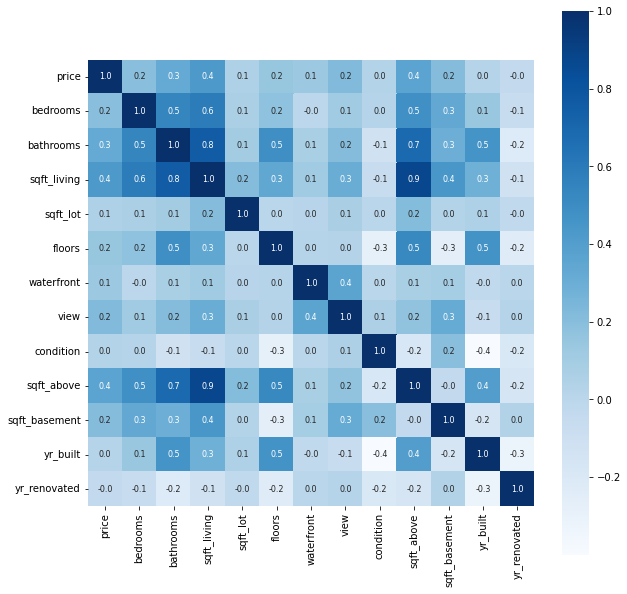

In [ ]:
c = data.corr()
plt.figure(figsize = (10, 10))
sb.heatmap(c, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [ ]:
data.loc[(data.yr_renovated != 0), 'yr_renovated'] = 1

In [ ]:
cat_data = data.select_dtypes(include = ['object'])
cat_columns = cat_data.columns
for c in cat_columns:
  data[c] = objToint(data[c])

In [ ]:
scaler = MinMaxScaler()
names = data.columns
d = scaler.fit_transform(data)
data = pd.DataFrame(d, columns=names)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,0.0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0.0,0.0,0.50,0.107301,0.000000,0.482456,1.0,0.336428,0.837209,0.815789,0.0
1,0.0,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0.0,1.0,1.00,0.331858,0.058091,0.184211,0.0,0.861848,0.813953,0.763158,0.0
2,0.0,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0.0,0.0,0.75,0.172566,0.000000,0.578947,0.0,0.506410,0.418605,0.342105,0.0
3,0.0,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0.0,0.0,0.75,0.069690,0.207469,0.552632,0.0,0.942308,0.069767,0.092105,0.0
4,0.0,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0.0,0.0,0.75,0.085177,0.165975,0.666667,1.0,0.961981,0.720930,0.407895,0.0


In [ ]:
y = data['price']
x = data.drop('price', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3105,0.753623,0.222222,0.12500,0.037206,0.001827,0.0,0.0,0.00,0.75,0.054204,0.000000,0.008772,0.0,0.827807,0.813953,0.657895,0.0
2171,0.550725,0.333333,0.12500,0.092635,0.011515,0.2,0.0,0.00,0.50,0.134956,0.000000,0.385965,0.0,0.169319,0.139535,0.894737,0.0
1886,0.478261,0.333333,0.28125,0.151860,0.008365,0.0,0.0,0.00,0.75,0.141593,0.149378,0.640351,0.0,0.316534,0.720930,0.407895,0.0
551,0.159420,0.444444,0.28125,0.162491,0.007011,0.0,0.0,0.00,0.75,0.137168,0.186722,0.631579,0.0,0.545756,0.325581,0.171053,0.0
1096,0.275362,0.444444,0.25000,0.097950,0.005134,0.0,0.0,0.00,0.50,0.053097,0.168050,0.394737,1.0,0.872016,0.813953,0.802632,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,0.478261,0.333333,0.25000,0.074412,0.009792,0.0,0.0,0.00,0.50,0.081858,0.049793,0.833333,0.0,0.706012,0.627907,0.355263,0.0
1572,0.391304,0.444444,0.31250,0.181473,0.005786,0.4,0.0,0.00,0.50,0.264381,0.000000,0.868421,0.0,0.891910,0.581395,0.447368,0.0
2515,0.623188,0.333333,0.31250,0.118451,0.006125,0.4,0.0,0.00,0.50,0.172566,0.000000,0.921053,0.0,0.341291,0.813953,0.789474,0.0
2933,0.710145,0.444444,0.40625,0.271071,0.025106,0.4,0.0,0.75,0.50,0.339602,0.103734,0.877193,0.0,0.292661,0.744186,0.486842,0.0


#Creat Model

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape = (17, )))
model.add(layers.Dense(10, activation='relu', input_shape = (18, )))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                360       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss= 'mse', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
trainedModel = model.fit(x_train, y_train, epochs = 100, validation_split = 0.15)

Epoch 1/100
98/98 [==============================] - 1s 4ms/step - loss: 0.0749 - accuracy: 0.0115 - val_loss: 0.0056 - val_accuracy: 0.0091
Epoch 2/100
98/98 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 0.0115 - val_loss: 9.9702e-04 - val_accuracy: 0.0091
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 7.6422e-04 - accuracy: 0.0115 - val_loss: 4.1971e-04 - val_accuracy: 0.0091
Epoch 4/100
98/98 [==============================] - 0s 2ms/step - loss: 4.5354e-04 - accuracy: 0.0115 - val_loss: 2.5964e-04 - val_accuracy: 0.0091
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 3.5665e-04 - accuracy: 0.0115 - val_loss: 2.0298e-04 - val_accuracy: 0.0091
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 3.1999e-04 - accuracy: 0.0115 - val_loss: 1.7947e-04 - val_accuracy: 0.0091
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 3.0454e-04 - accuracy: 0.0115 - val_loss: 1.6

"plt.figure()\nplt.xlabel('Epochs')\nplt.ylabel('accuracy')\nplt.plot(acc)\nplt.plot(val_acc)\nplt.legend(['acc','val_acc'])"

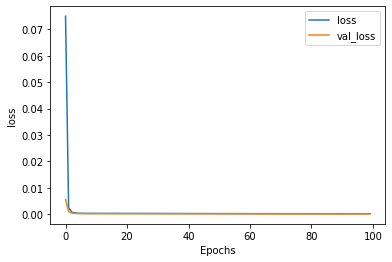

In [ ]:
history = trainedModel.history
loss = history['loss']
val_loss = history['val_loss']
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])

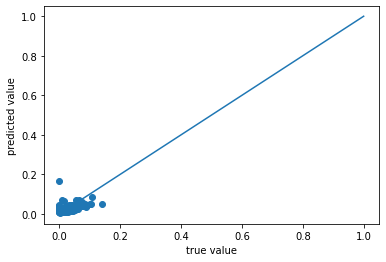

0.00010459738405188546


In [ ]:
#test_loss, test_acc = model.evaluate(x_test, y_test)
test_labels = model.predict(x_test)
x=[0,1]
y=[0,1]
plt.scatter(y_test,test_labels)
plt.plot(x,y)
plt.xlabel('true value')
plt.ylabel('predicted value')
plt.show()
print(test_loss)